In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from epftoolbox.evaluation import MAE, rMAE, RMSE, sMAPE, plot_multivariate_DM_test, DM
from itertools import permutations
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'serif'

# OMIE-SP

In [2]:
dict_modelos = {
    'lear_2_años': 'espana_final_2_anos_ventana.csv',
    'lear_1_año': 'espana_final_1_ano_ventana.csv',
    'lear_6_meses': 'espana_final_6_meses_ventana.csv',
    'dnn': 'dnn_espana_final.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_espana_final_sin_ventana.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_espana_final_2_anos_ventana.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_espana_final_1_ano_ventana.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_espana_final_6_meses_ventana.csv',
    'dnn_estandarizacion_movil': 'dnn_espana_estandarizacion_movil_final.csv'
}

In [3]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2022, 1, 1), dt.datetime(2023, 5, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [4]:
df_md_espana = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\df_espana_final.csv")

In [5]:
df_md_espana

,Date,Price,Exogenous 1,Exogenous 2,Exogenous 3,Exogenous 4
0,2019-01-02 00:00:00,64.03,24914.0,5795.0,0.0,19.500
1,2019-01-02 01:00:00,61.74,22758.0,6460.0,0.0,24.400
2,2019-01-02 02:00:00,53.00,20772.0,6684.0,0.0,15.200
3,2019-01-02 03:00:00,48.23,19690.0,6957.0,0.0,24.300
4,2019-01-02 04:00:00,47.23,19176.0,7292.0,0.0,6.000
...,...,...,...,...,...,...
38659,2023-05-31 19:00:00,78.89,25595.5,2325.8,8196.5,1413.275
38660,2023-05-31 20:00:00,85.00,26170.3,2345.5,5498.0,1340.275
38661,2023-05-31 21:00:00,105.00,26918.3,2253.3,1989.3,1021.550
38662,2023-05-31 22:00:00,119.06,27557.3,2265.3,232.8,681.525


In [6]:
df['md_espana'] = df_md_espana[pd.to_datetime(df_md_espana.Date) >= dt.datetime(2022, 1, 1)].Price.to_numpy()

In [7]:
for k, v in dict_modelos.items():
    print(k)
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

lear_2_años
lear_1_año
lear_6_meses
dnn
lear_estandarizacion_movil
lear_estandarizacion_movil_2_años
lear_estandarizacion_movil_1_año
lear_estandarizacion_movil_6_meses
dnn_estandarizacion_movil


In [8]:
df

,fecha_completa,fecha,hora,md_espana,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2022-01-01 00:00:00,2022-01-01,0,127.81,134.869423,134.124587,134.619950,150.979095,130.116931,129.356664,128.816475,128.989012,117.303882
1,2022-01-01 01:00:00,2022-01-01,1,145.86,122.504324,114.339707,111.379144,144.177338,116.841192,106.778359,120.319148,134.483101,105.107915
2,2022-01-01 02:00:00,2022-01-01,2,114.90,114.539001,107.524849,105.071493,128.430817,100.475170,89.589494,107.636728,130.960315,87.112543
3,2022-01-01 03:00:00,2022-01-01,3,113.87,103.982742,97.087941,96.537899,116.471107,90.001933,81.158901,109.598264,120.905325,88.720725
4,2022-01-01 04:00:00,2022-01-01,4,97.80,101.428858,96.480897,93.965934,101.845047,74.809897,73.149642,95.703791,114.432637,80.601588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,78.89,84.623171,95.461020,94.390293,87.909203,86.311062,87.445011,84.350475,83.974108,88.184946
12380,2023-05-31 20:00:00,2023-05-31,20,85.00,95.715490,111.041722,112.937629,104.907005,97.426801,98.145099,93.703139,97.613445,99.080150
12381,2023-05-31 21:00:00,2023-05-31,21,105.00,115.478906,127.453070,131.452936,112.699570,110.001260,111.729235,110.891486,108.826370,110.532299
12382,2023-05-31 22:00:00,2023-05-31,22,119.06,124.613352,131.593704,137.171773,121.731674,119.181507,119.517156,118.678732,116.449956,115.072375


In [9]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [10]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_espana, df[modelo])
    maes.append(mae)

In [11]:
resultados.loc['MAE', :] = maes

In [12]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_espana, df[modelo])
    rmses.append(rmse)

In [13]:
resultados.loc['RMSE', :] = rmses

In [14]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_espana, df[modelo])
    smapes.append(smape)

In [15]:
resultados.loc['sMAPE', :] = smapes

In [16]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_espana']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [17]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2022-01-01,127.81,145.86,114.90,113.87,97.80,97.80,95.74,97.80,97.80,97.80,...,96.80,97.80,98.52,114.50,149.97,177.22,187.52,189.26,190.81,188.39
2022-01-02,167.26,133.21,115.87,110.52,113.00,115.87,110.52,115.87,129.60,115.87,...,110.52,115.87,109.50,115.87,159.79,194.25,198.00,208.38,209.10,191.36
2022-01-03,178.00,181.50,160.72,154.64,149.86,144.49,148.86,153.77,160.72,189.26,...,142.04,127.38,112.87,126.80,148.49,175.06,180.00,153.77,141.94,114.11
2022-01-04,100.36,125.47,115.55,113.29,105.81,105.00,115.11,153.77,161.03,178.91,...,179.59,163.20,157.30,157.30,163.78,184.94,178.99,156.12,148.65,137.92
2022-01-05,105.00,120.11,105.10,84.50,75.38,79.11,94.79,169.04,206.07,211.13,...,197.34,195.60,200.00,206.07,211.23,225.00,250.34,241.93,218.95,207.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,99.77,96.86,90.00,84.73,81.35,84.85,87.26,90.27,87.29,87.26,...,82.01,66.75,61.71,57.85,58.41,84.85,95.11,100.82,108.21,109.35
2023-05-28,110.00,105.42,100.00,99.37,100.00,100.00,100.00,97.85,90.42,83.06,...,70.47,69.57,54.17,50.00,51.00,55.00,73.28,100.01,109.08,115.38
2023-05-29,107.64,91.84,91.84,84.75,84.75,84.75,85.80,100.00,112.89,110.20,...,84.45,83.85,81.42,80.00,81.00,84.05,84.95,121.00,131.86,129.40


In [18]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [19]:
resultados.loc['rMAE', :] = rmaes

In [20]:
pd.set_option('display.precision', 2)

In [21]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,19.46,19.4,19.75,19.0,18.29,18.51,18.71,18.97,17.93
RMSE,27.57,27.96,28.43,27.04,25.93,26.19,26.84,27.05,25.49
sMAPE,0.22,0.22,0.22,0.21,0.21,0.21,0.21,0.21,0.21
rMAE,0.65,0.65,0.66,0.64,0.61,0.62,0.63,0.63,0.6


## MAE by month

In [22]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [23]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_espana, df_month[modelo]))

In [24]:
markers = ['o', 's', '^', 'd']
linestyles=['-', '-', '--', '--']
colors = [mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['orangered']]

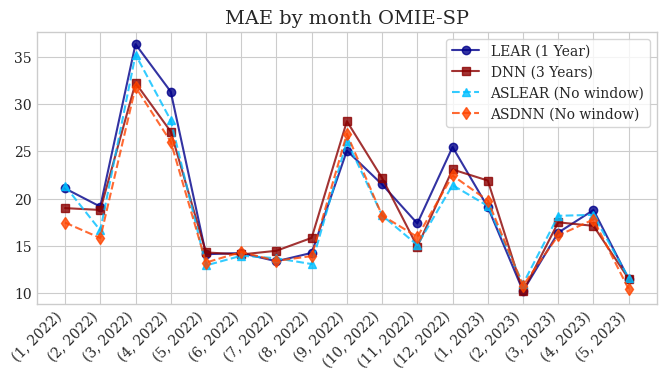

In [25]:
markers = ['o', 's', '^', 'd']
linestyles=['-', '-', '--', '--']
colors = [mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['orangered']]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_1_año', 'LEAR (1 Year)'), ('dnn', 'DNN (3 Years)'), ('lear_estandarizacion_movil_2_años', 'ASLEAR (No window)'), ('dnn_estandarizacion_movil', 'ASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month OMIE-SP")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [26]:
# fig.savefig("mae_by_month_spain.eps")

# DM test

In [27]:
resultados.columns = ['LEAR (2 Years)', 'LEAR (1 Year)', 'LEAR (6 Months)', 'DNN (3 Years)',
                      'ASLEAR (No window)', 'ASLEAR (2 Years)',
                      'ASLEAR (1 Year)',
                      'ASLEAR (6 Months)', 'ASDNN (No window)']

In [28]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_espana',
 'LEAR (2 Years)',
 'LEAR (1 Year)',
 'LEAR (6 Months)',
 'DNN (3 Years)',
 'ASLEAR (No window)',
 'ASLEAR (2 Years)',
 'ASLEAR (1 Year)',
 'ASLEAR (6 Months)',
 'ASDNN (No window)']

In [29]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

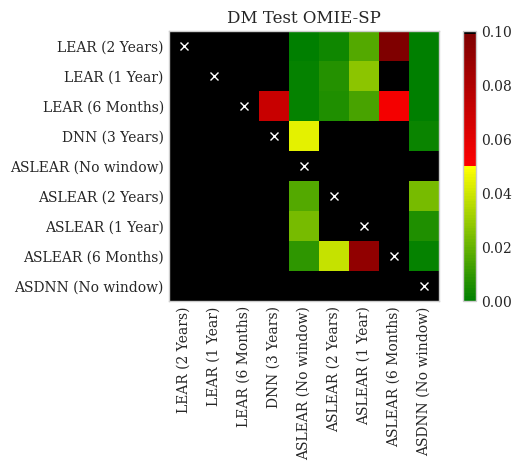

In [30]:
plot_multivariate_DM_test(real_price=df.md_espana, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test OMIE-SP')

# OMIE-SP no outliers

In [31]:
dict_modelos = {
    'lear_2_años': 'espana_final_2_anos_ventana_no_outliers.csv',
    'lear_1_año': 'espana_final_1_ano_ventana_no_outliers.csv',
    'lear_6_meses': 'espana_final_6_meses_ventana_no_outliers.csv',
    'dnn': 'dnn_espana_final_no_outliers.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_espana_final_sin_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_espana_final_2_anos_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_espana_final_1_ano_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_espana_final_6_meses_ventana_no_outliers.csv',
    'dnn_estandarizacion_movil': 'dnn_espana_estandarizacion_movil_final_no_outliers.csv'
}

In [32]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2022, 1, 1), dt.datetime(2023, 5, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [33]:
df_md_espana = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\df_espana_final.csv")

In [34]:
df['md_espana'] = df_md_espana[pd.to_datetime(df_md_espana.Date) >= dt.datetime(2022, 1, 1)].Price.to_numpy()

In [35]:
df

,fecha_completa,fecha,hora,md_espana
0,2022-01-01 00:00:00,2022-01-01,0,127.81
1,2022-01-01 01:00:00,2022-01-01,1,145.86
2,2022-01-01 02:00:00,2022-01-01,2,114.90
3,2022-01-01 03:00:00,2022-01-01,3,113.87
4,2022-01-01 04:00:00,2022-01-01,4,97.80
...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,78.89
12380,2023-05-31 20:00:00,2023-05-31,20,85.00
12381,2023-05-31 21:00:00,2023-05-31,21,105.00
12382,2023-05-31 22:00:00,2023-05-31,22,119.06


In [36]:
for k, v in dict_modelos.items():
    print(k)
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

lear_2_años
lear_1_año
lear_6_meses
dnn
lear_estandarizacion_movil
lear_estandarizacion_movil_2_años
lear_estandarizacion_movil_1_año
lear_estandarizacion_movil_6_meses
dnn_estandarizacion_movil


In [37]:
df

,fecha_completa,fecha,hora,md_espana,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2022-01-01 00:00:00,2022-01-01,0,127.81,185.53,183.16,198.09,192.43,182.41,181.48,186.19,171.56,136.08
1,2022-01-01 01:00:00,2022-01-01,1,145.86,183.45,196.95,184.05,200.83,182.03,174.98,181.56,188.01,121.22
2,2022-01-01 02:00:00,2022-01-01,2,114.90,163.21,173.68,172.57,189.56,147.69,147.72,165.27,171.50,90.15
3,2022-01-01 03:00:00,2022-01-01,3,113.87,149.13,182.03,196.73,186.08,116.34,117.63,157.04,168.06,70.89
4,2022-01-01 04:00:00,2022-01-01,4,97.80,150.56,173.29,187.10,177.54,101.78,106.05,159.62,174.89,63.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,78.89,87.11,98.26,97.57,107.08,85.00,89.72,85.68,86.14,87.38
12380,2023-05-31 20:00:00,2023-05-31,20,85.00,101.46,113.15,113.58,115.71,100.27,103.21,99.77,105.97,102.80
12381,2023-05-31 21:00:00,2023-05-31,21,105.00,116.41,129.13,124.68,124.36,111.84,113.04,112.31,110.68,116.01
12382,2023-05-31 22:00:00,2023-05-31,22,119.06,127.16,136.66,127.75,129.20,120.57,121.14,120.84,117.34,121.67


In [38]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [39]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_espana, df[modelo])
    maes.append(mae)

In [40]:
resultados.loc['MAE', :] = maes

In [41]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_espana, df[modelo])
    rmses.append(rmse)

In [42]:
resultados.loc['RMSE', :] = rmses

In [43]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_espana, df[modelo])
    smapes.append(smape)

In [44]:
resultados.loc['sMAPE', :] = smapes

In [45]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_espana']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [46]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2022-01-01,127.81,145.86,114.90,113.87,97.80,97.80,95.74,97.80,97.80,97.80,...,96.80,97.80,98.52,114.50,149.97,177.22,187.52,189.26,190.81,188.39
2022-01-02,167.26,133.21,115.87,110.52,113.00,115.87,110.52,115.87,129.60,115.87,...,110.52,115.87,109.50,115.87,159.79,194.25,198.00,208.38,209.10,191.36
2022-01-03,178.00,181.50,160.72,154.64,149.86,144.49,148.86,153.77,160.72,189.26,...,142.04,127.38,112.87,126.80,148.49,175.06,180.00,153.77,141.94,114.11
2022-01-04,100.36,125.47,115.55,113.29,105.81,105.00,115.11,153.77,161.03,178.91,...,179.59,163.20,157.30,157.30,163.78,184.94,178.99,156.12,148.65,137.92
2022-01-05,105.00,120.11,105.10,84.50,75.38,79.11,94.79,169.04,206.07,211.13,...,197.34,195.60,200.00,206.07,211.23,225.00,250.34,241.93,218.95,207.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,99.77,96.86,90.00,84.73,81.35,84.85,87.26,90.27,87.29,87.26,...,82.01,66.75,61.71,57.85,58.41,84.85,95.11,100.82,108.21,109.35
2023-05-28,110.00,105.42,100.00,99.37,100.00,100.00,100.00,97.85,90.42,83.06,...,70.47,69.57,54.17,50.00,51.00,55.00,73.28,100.01,109.08,115.38
2023-05-29,107.64,91.84,91.84,84.75,84.75,84.75,85.80,100.00,112.89,110.20,...,84.45,83.85,81.42,80.00,81.00,84.05,84.95,121.00,131.86,129.40


In [47]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [48]:
resultados.loc['rMAE', :] = rmaes

In [49]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,22.13,22.23,22.81,24.1,20.41,21.24,22.2,22.81,22.33
RMSE,32.82,32.46,33.54,35.11,30.33,31.42,32.9,33.59,32.28
sMAPE,0.24,0.23,0.24,0.24,0.23,0.23,0.23,0.24,0.25
rMAE,0.74,0.74,0.76,0.81,0.68,0.71,0.74,0.76,0.75


## MAE by month

In [50]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [51]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_espana, df_month[modelo]))

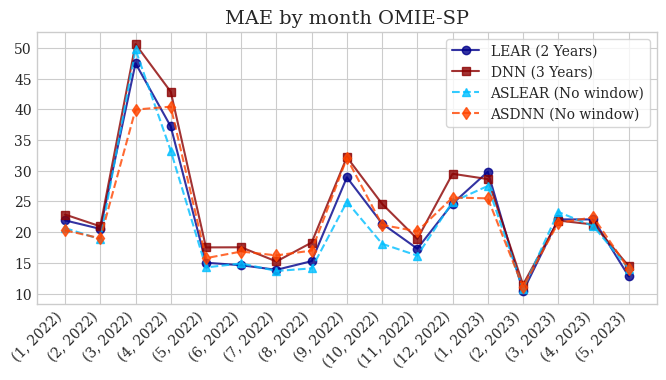

In [52]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'LEAR (2 Years)'), ('dnn', 'DNN (3 Years)'), ('lear_estandarizacion_movil_2_años', 'ASLEAR (No window)'), ('dnn_estandarizacion_movil', 'ASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month OMIE-SP")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

# DM test

In [53]:
resultados.columns = ['OLEAR (2 Years)', 'OLEAR (1 Year)', 'OLEAR (6 Months)', 'ODNN (3 Years)',
                      'OASLEAR (No window)', 'OASLEAR (2 Years)',
                      'OASLEAR (1 Year)',
                      'OASLEAR (6 Months)', 'OASDNN (No window)']

In [54]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_espana',
 'OLEAR (2 Years)',
 'OLEAR (1 Year)',
 'OLEAR (6 Months)',
 'ODNN (3 Years)',
 'OASLEAR (No window)',
 'OASLEAR (2 Years)',
 'OASLEAR (1 Year)',
 'OASLEAR (6 Months)',
 'OASDNN (No window)']

In [55]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

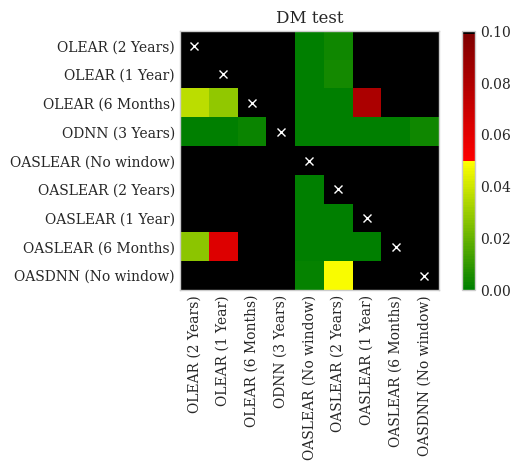

In [56]:
plot_multivariate_DM_test(real_price=df.md_espana, forecasts=df[resultados.columns], savefig=False, path="")

# EPEX-DE

In [57]:
dict_modelos = {
    'lear_2_años': 'alemania_final_2_anos_ventana.csv',
    'lear_1_año': 'alemania_final_1_ano_ventana.csv',
    'lear_6_meses': 'alemania_final_6_meses_ventana.csv',
    'dnn': 'dnn_alemania_final.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_alemania_final_sin_ventana.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_alemania_final_2_anos_ventana.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_alemania_final_1_ano_ventana.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_alemania_final_6_meses_ventana.csv',
    'dnn_estandarizacion_movil': 'dnn_alemania_estandarizacion_movil_final.csv'
}

In [58]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2022, 1, 1), dt.datetime(2023, 5, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [59]:
df_md_alemania = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\df_alemania_final.csv")

In [60]:
df['md_alemania'] = df_md_alemania[pd.to_datetime(df_md_alemania.Date) >= dt.datetime(2022, 1, 1)].Price.to_numpy()

In [61]:
df

,fecha_completa,fecha,hora,md_alemania
0,2022-01-01 00:00:00,2022-01-01,0,50.05
1,2022-01-01 01:00:00,2022-01-01,1,41.33
2,2022-01-01 02:00:00,2022-01-01,2,43.22
3,2022-01-01 03:00:00,2022-01-01,3,45.46
4,2022-01-01 04:00:00,2022-01-01,4,37.67
...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,108.26
12380,2023-05-31 20:00:00,2023-05-31,20,119.60
12381,2023-05-31 21:00:00,2023-05-31,21,103.69
12382,2023-05-31 22:00:00,2023-05-31,22,94.28


In [62]:
for k, v in dict_modelos.items():
    print(k)
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

lear_2_años
lear_1_año
lear_6_meses
dnn
lear_estandarizacion_movil
lear_estandarizacion_movil_2_años
lear_estandarizacion_movil_1_año
lear_estandarizacion_movil_6_meses
dnn_estandarizacion_movil


In [63]:
df

,fecha_completa,fecha,hora,md_alemania,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2022-01-01 00:00:00,2022-01-01,0,50.05,-9.47,-14.66,10.73,1.87,-6.79,-9.83,0.16,5.30,2.26
1,2022-01-01 01:00:00,2022-01-01,1,41.33,-15.42,-13.12,7.92,2.30,-12.94,-13.48,7.02,1.25,-10.20
2,2022-01-01 02:00:00,2022-01-01,2,43.22,-17.41,-2.95,16.82,0.02,-16.04,-12.03,8.02,14.58,-12.26
3,2022-01-01 03:00:00,2022-01-01,3,45.46,-18.19,0.38,20.80,0.26,-15.78,-14.71,10.12,16.16,-6.63
4,2022-01-01 04:00:00,2022-01-01,4,37.67,-15.46,-7.57,13.88,1.82,-13.00,-12.84,11.66,12.52,-4.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,108.26,93.36,110.50,115.42,107.28,126.07,122.79,131.89,117.90,125.20
12380,2023-05-31 20:00:00,2023-05-31,20,119.60,99.84,117.05,132.07,113.30,137.84,134.94,134.66,138.99,128.31
12381,2023-05-31 21:00:00,2023-05-31,21,103.69,89.58,109.30,117.11,105.16,111.81,116.03,111.03,115.62,113.99
12382,2023-05-31 22:00:00,2023-05-31,22,94.28,81.07,99.27,104.80,96.09,92.43,94.07,94.32,96.34,102.06


In [64]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [65]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_alemania, df[modelo])
    maes.append(mae)

In [66]:
resultados.loc['MAE', :] = maes

In [67]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_alemania, df[modelo])
    rmses.append(rmse)

In [68]:
resultados.loc['RMSE', :] = rmses

In [69]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_alemania, df[modelo])
    smapes.append(smape)

In [70]:
resultados.loc['sMAPE', :] = smapes

In [71]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_alemania']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [72]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2022-01-01,50.05,41.33,43.22,45.46,37.67,39.70,40.59,43.26,49.66,70.05,...,97.17,101.00,126.60,149.97,146.33,140.28,121.88,102.61,97.46,85.16
2022-01-02,57.08,52.59,48.97,34.94,29.56,33.97,34.52,41.80,48.95,60.01,...,40.01,29.11,32.76,42.97,60.96,60.94,54.12,46.16,46.29,32.93
2022-01-03,0.31,-0.01,-0.07,-1.05,-1.00,0.32,37.55,88.76,122.93,110.17,...,80.99,98.05,123.51,148.49,138.00,117.64,117.71,95.95,105.68,95.26
2022-01-04,103.70,108.27,105.92,103.41,102.71,114.23,156.91,182.64,178.91,190.00,...,179.00,180.93,166.69,189.88,184.94,178.99,156.12,140.92,137.92,97.56
2022-01-05,105.31,97.29,84.50,75.38,79.11,94.79,99.16,101.15,129.56,113.37,...,107.32,119.48,137.28,148.09,139.88,135.75,119.93,98.09,118.71,99.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,89.69,83.53,84.73,86.33,91.25,90.00,82.70,82.99,72.61,55.06,...,-2.39,0.51,2.26,55.08,84.85,100.38,124.93,113.08,100.03,94.71
2023-05-28,87.09,84.00,81.92,77.87,77.86,76.47,72.02,64.84,37.70,0.00,...,-129.96,-98.08,-18.68,-0.06,50.00,72.90,80.01,77.84,73.80,69.50
2023-05-29,59.23,53.90,51.82,48.51,54.52,63.36,67.65,58.71,29.92,0.00,...,-109.45,-80.69,-19.97,-4.98,19.20,72.08,83.75,85.88,80.48,74.26


In [73]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [74]:
resultados.loc['rMAE', :] = rmaes

In [75]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,28.54,30.67,28.86,27.29,26.11,26.01,26.47,27.37,25.4
RMSE,40.6,42.52,41.89,39.13,38.86,38.65,39.14,40.12,37.15
sMAPE,0.23,0.25,0.24,0.22,0.22,0.22,0.22,0.23,0.22
rMAE,0.51,0.55,0.52,0.49,0.47,0.47,0.47,0.49,0.46


## MAE by month

In [76]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [77]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_alemania, df_month[modelo]))

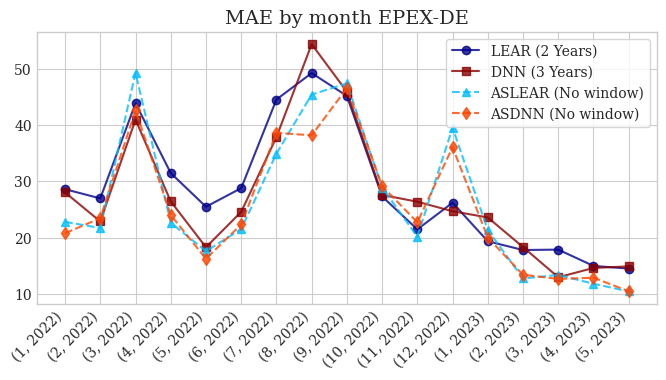

In [78]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'LEAR (2 Years)'), ('dnn', 'DNN (3 Years)'), ('lear_estandarizacion_movil', 'ASLEAR (No window)'), ('dnn_estandarizacion_movil', 'ASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month EPEX-DE")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [79]:
# fig.savefig("mae_by_month_germany.eps")

# DM test

In [80]:
resultados.columns = ['LEAR (2 Years)', 'LEAR (1 Year)', 'LEAR (6 Months)', 'DNN (3 Years)',
                      'ASLEAR (No window)', 'ASLEAR (2 Years)',
                      'ASLEAR (1 Year)',
                      'ASLEAR (6 Months)', 'ASDNN (No window)']

In [81]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_alemania',
 'LEAR (2 Years)',
 'LEAR (1 Year)',
 'LEAR (6 Months)',
 'DNN (3 Years)',
 'ASLEAR (No window)',
 'ASLEAR (2 Years)',
 'ASLEAR (1 Year)',
 'ASLEAR (6 Months)',
 'ASDNN (No window)']

In [82]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

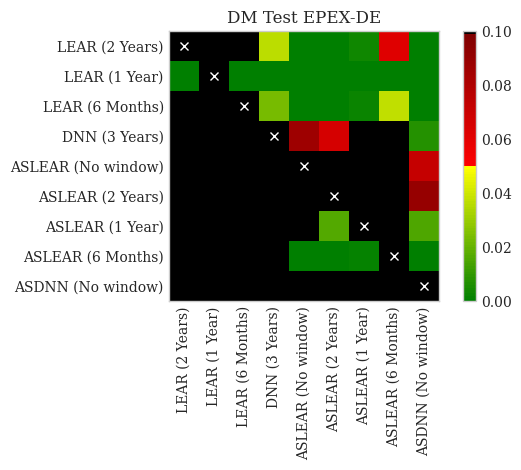

In [83]:
plot_multivariate_DM_test(real_price=df.md_alemania, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test EPEX-DE')

# EPEX-DE no outliers

In [84]:
dict_modelos = {
    'lear_2_años': 'alemania_final_2_anos_ventana_no_outliers.csv',
    'lear_1_año': 'alemania_final_1_ano_ventana_no_outliers.csv',
    'lear_6_meses': 'alemania_final_6_meses_ventana_no_outliers.csv',
    'dnn': 'dnn_alemania_final_no_outliers.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_alemania_final_sin_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_alemania_final_2_anos_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_alemania_final_1_ano_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_alemania_final_6_meses_ventana_no_outliers.csv',
    'dnn_estandarizacion_movil': 'dnn_alemania_estandarizacion_movil_final_no_outliers.csv'
}

In [85]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2022, 1, 1), dt.datetime(2023, 5, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [86]:
df_md_alemania = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\df_alemania_final.csv")

In [87]:
df['md_alemania'] = df_md_alemania[pd.to_datetime(df_md_alemania.Date) >= dt.datetime(2022, 1, 1)].Price.to_numpy()

In [88]:
df

,fecha_completa,fecha,hora,md_alemania
0,2022-01-01 00:00:00,2022-01-01,0,50.05
1,2022-01-01 01:00:00,2022-01-01,1,41.33
2,2022-01-01 02:00:00,2022-01-01,2,43.22
3,2022-01-01 03:00:00,2022-01-01,3,45.46
4,2022-01-01 04:00:00,2022-01-01,4,37.67
...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,108.26
12380,2023-05-31 20:00:00,2023-05-31,20,119.60
12381,2023-05-31 21:00:00,2023-05-31,21,103.69
12382,2023-05-31 22:00:00,2023-05-31,22,94.28


In [89]:
for k, v in dict_modelos.items():
    print(k)
    df[k] = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\DOCTORADO\Papers\On work\Estandarización móvil\Notebooks\Resultados/Buenos//" + v, index_col=0).to_numpy().reshape(-1,)

lear_2_años
lear_1_año
lear_6_meses
dnn
lear_estandarizacion_movil
lear_estandarizacion_movil_2_años
lear_estandarizacion_movil_1_año
lear_estandarizacion_movil_6_meses
dnn_estandarizacion_movil


In [90]:
df

,fecha_completa,fecha,hora,md_alemania,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2022-01-01 00:00:00,2022-01-01,0,50.05,2.53,-4.24,8.22,11.72,6.26,2.53,14.13,11.96,-6.08
1,2022-01-01 01:00:00,2022-01-01,1,41.33,-3.74,-12.32,-1.77,8.46,-1.14,-0.94,17.83,7.32,-5.10
2,2022-01-01 02:00:00,2022-01-01,2,43.22,-5.64,-6.14,10.67,6.55,-2.95,3.80,20.64,16.40,-7.86
3,2022-01-01 03:00:00,2022-01-01,3,45.46,-12.88,-1.33,21.80,5.11,-5.19,0.58,21.28,17.59,-14.16
4,2022-01-01 04:00:00,2022-01-01,4,37.67,-9.21,-4.32,19.30,8.70,-3.87,1.10,27.93,18.38,-11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,108.26,105.97,109.87,109.14,115.77,126.44,129.34,129.61,111.88,125.87
12380,2023-05-31 20:00:00,2023-05-31,20,119.60,118.55,126.35,127.84,119.68,137.38,135.14,138.01,121.24,128.55
12381,2023-05-31 21:00:00,2023-05-31,21,103.69,113.42,119.13,116.45,115.81,112.95,113.60,117.35,111.36,115.91
12382,2023-05-31 22:00:00,2023-05-31,22,94.28,96.75,103.03,104.01,108.66,92.20,96.05,98.81,91.76,102.67


In [91]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [92]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_alemania, df[modelo])
    maes.append(mae)

In [93]:
resultados.loc['MAE', :] = maes

In [94]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_alemania, df[modelo])
    rmses.append(rmse)

In [95]:
resultados.loc['RMSE', :] = rmses

In [96]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_alemania, df[modelo])
    smapes.append(smape)

In [97]:
resultados.loc['sMAPE', :] = smapes

In [98]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_alemania']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [99]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2022-01-01,50.05,41.33,43.22,45.46,37.67,39.70,40.59,43.26,49.66,70.05,...,97.17,101.00,126.60,149.97,146.33,140.28,121.88,102.61,97.46,85.16
2022-01-02,57.08,52.59,48.97,34.94,29.56,33.97,34.52,41.80,48.95,60.01,...,40.01,29.11,32.76,42.97,60.96,60.94,54.12,46.16,46.29,32.93
2022-01-03,0.31,-0.01,-0.07,-1.05,-1.00,0.32,37.55,88.76,122.93,110.17,...,80.99,98.05,123.51,148.49,138.00,117.64,117.71,95.95,105.68,95.26
2022-01-04,103.70,108.27,105.92,103.41,102.71,114.23,156.91,182.64,178.91,190.00,...,179.00,180.93,166.69,189.88,184.94,178.99,156.12,140.92,137.92,97.56
2022-01-05,105.31,97.29,84.50,75.38,79.11,94.79,99.16,101.15,129.56,113.37,...,107.32,119.48,137.28,148.09,139.88,135.75,119.93,98.09,118.71,99.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,89.69,83.53,84.73,86.33,91.25,90.00,82.70,82.99,72.61,55.06,...,-2.39,0.51,2.26,55.08,84.85,100.38,124.93,113.08,100.03,94.71
2023-05-28,87.09,84.00,81.92,77.87,77.86,76.47,72.02,64.84,37.70,0.00,...,-129.96,-98.08,-18.68,-0.06,50.00,72.90,80.01,77.84,73.80,69.50
2023-05-29,59.23,53.90,51.82,48.51,54.52,63.36,67.65,58.71,29.92,0.00,...,-109.45,-80.69,-19.97,-4.98,19.20,72.08,83.75,85.88,80.48,74.26


In [100]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [101]:
resultados.loc['rMAE', :] = rmaes

In [102]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,34.06,35.44,36.85,33.49,32.46,34.05,36.05,36.96,32.24
RMSE,51.43,52.28,55.26,52.78,52.33,54.14,56.59,57.43,51.01
sMAPE,0.26,0.27,0.27,0.25,0.24,0.25,0.26,0.27,0.24
rMAE,0.61,0.63,0.66,0.6,0.58,0.61,0.65,0.66,0.58


## MAE by month

In [103]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [104]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_alemania, df_month[modelo]))

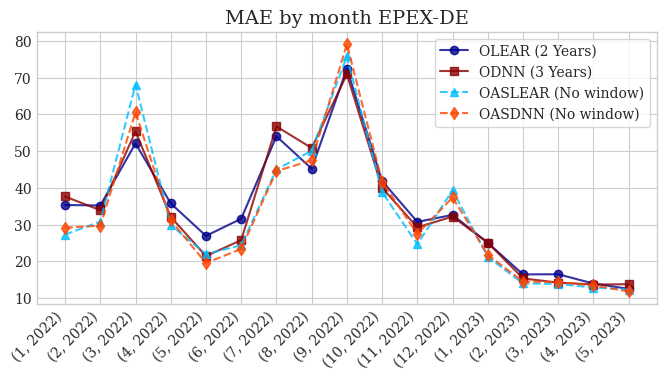

In [105]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'OLEAR (2 Years)'), ('dnn', 'ODNN (3 Years)'), ('lear_estandarizacion_movil', 'OASLEAR (No window)'), ('dnn_estandarizacion_movil', 'OASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month EPEX-DE")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [106]:
# fig.savefig("mae_by_month_germany.eps")

# DM test

In [110]:
resultados.columns = ['OLEAR (2 Years)', 'OLEAR (1 Year)', 'OLEAR (6 Months)', 'ODNN (3 Years)',
                      'OASLEAR (No window)', 'OASLEAR (2 Years)',
                      'OASLEAR (1 Year)',
                      'OASLEAR (6 Months)', 'OASDNN (No window)']

In [111]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_alemania',
 'OLEAR (2 Years)',
 'OLEAR (1 Year)',
 'OLEAR (6 Months)',
 'ODNN (3 Years)',
 'OASLEAR (No window)',
 'OASLEAR (2 Years)',
 'OASLEAR (1 Year)',
 'OASLEAR (6 Months)',
 'OASDNN (No window)']

In [112]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

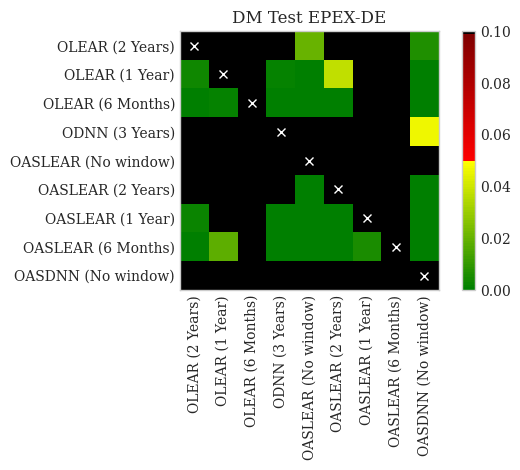

In [113]:
plot_multivariate_DM_test(real_price=df.md_alemania, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test EPEX-DE')

# EPEX-FR

In [114]:
dict_modelos = {
    'lear_2_años': 'fr_epftoolbox_final_2_anos_ventana.csv',
    'lear_1_año': 'fr_epftoolbox_final_1_ano_ventana.csv',
    'lear_6_meses': 'fr_epftoolbox_final_6_meses_ventana.csv',
    'dnn': 'dnn_FR_final.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_FR_epftoolbox_final_sin_ventana.csv',#'estandarizacion_movil_lear_FR_epftoolbox_final_sin_ventana.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_FR_epftoolbox_final_2_anos_ventana.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_FR_epftoolbox_final_1_ano_ventana.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_FR_epftoolbox_final_6_meses_ventana.csv',
    'dnn_estandarizacion_movil': 'dnn_FR_estandarizacion_movil_final.csv'
}

In [115]:
df

,fecha_completa,fecha,hora,md_alemania,OLEAR (2 Years),OLEAR (1 Year),OLEAR (6 Months),ODNN (3 Years),OASLEAR (No window),OASLEAR (2 Years),OASLEAR (1 Year),OASLEAR (6 Months),OASDNN (No window),mes,año
0,2022-01-01 00:00:00,2022-01-01,0,50.05,2.53,-4.24,8.22,11.72,6.26,2.53,14.13,11.96,-6.08,1,2022
1,2022-01-01 01:00:00,2022-01-01,1,41.33,-3.74,-12.32,-1.77,8.46,-1.14,-0.94,17.83,7.32,-5.10,1,2022
2,2022-01-01 02:00:00,2022-01-01,2,43.22,-5.64,-6.14,10.67,6.55,-2.95,3.80,20.64,16.40,-7.86,1,2022
3,2022-01-01 03:00:00,2022-01-01,3,45.46,-12.88,-1.33,21.80,5.11,-5.19,0.58,21.28,17.59,-14.16,1,2022
4,2022-01-01 04:00:00,2022-01-01,4,37.67,-9.21,-4.32,19.30,8.70,-3.87,1.10,27.93,18.38,-11.33,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,2023-05-31 19:00:00,2023-05-31,19,108.26,105.97,109.87,109.14,115.77,126.44,129.34,129.61,111.88,125.87,5,2023
12380,2023-05-31 20:00:00,2023-05-31,20,119.60,118.55,126.35,127.84,119.68,137.38,135.14,138.01,121.24,128.55,5,2023
12381,2023-05-31 21:00:00,2023-05-31,21,103.69,113.42,119.13,116.45,115.81,112.95,113.60,117.35,111.36,115.91,5,2023
12382,2023-05-31 22:00:00,2023-05-31,22,94.28,96.75,103.03,104.01,108.66,92.20,96.05,98.81,91.76,102.67,5,2023


In [116]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2015, 1, 1), dt.datetime(2016, 12, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [117]:
df_md_FR = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\FR.csv")

In [118]:
df['md_FR'] = df_md_FR[pd.to_datetime(df_md_FR.Date) >= dt.datetime(2015, 1, 1)][' Prices'].to_numpy()

In [119]:
df

,fecha_completa,fecha,hora,md_FR
0,2015-01-01 00:00:00,2015-01-01,0,53.48
1,2015-01-01 01:00:00,2015-01-01,1,51.93
2,2015-01-01 02:00:00,2015-01-01,2,48.76
3,2015-01-01 03:00:00,2015-01-01,3,42.27
4,2015-01-01 04:00:00,2015-01-01,4,38.41
...,...,...,...,...
17539,2016-12-31 19:00:00,2016-12-31,19,69.72
17540,2016-12-31 20:00:00,2016-12-31,20,57.10
17541,2016-12-31 21:00:00,2016-12-31,21,54.49
17542,2016-12-31 22:00:00,2016-12-31,22,54.95


In [120]:
for k, v in dict_modelos.items():
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

In [121]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [122]:
df

,fecha_completa,fecha,hora,md_FR,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2015-01-01 00:00:00,2015-01-01,0,53.48,41.36,40.55,43.14,45.73,43.81,43.32,44.51,44.18,45.95
1,2015-01-01 01:00:00,2015-01-01,1,51.93,37.83,36.21,39.83,42.42,39.85,40.83,42.11,40.42,41.37
2,2015-01-01 02:00:00,2015-01-01,2,48.76,34.47,32.50,34.81,38.36,38.06,38.64,41.38,43.04,37.24
3,2015-01-01 03:00:00,2015-01-01,3,42.27,30.07,27.57,28.70,33.20,33.26,35.76,37.18,35.93,32.15
4,2015-01-01 04:00:00,2015-01-01,4,38.41,29.08,26.81,28.01,30.11,31.18,32.28,34.75,35.68,29.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2016-12-31 19:00:00,2016-12-31,19,69.72,74.43,72.36,75.85,72.03,75.06,75.65,77.51,85.80,79.11
17540,2016-12-31 20:00:00,2016-12-31,20,57.10,67.03,64.73,65.50,63.98,67.73,67.74,68.44,68.21,67.57
17541,2016-12-31 21:00:00,2016-12-31,21,54.49,58.76,57.86,58.35,57.75,63.89,64.16,65.34,63.89,62.06
17542,2016-12-31 22:00:00,2016-12-31,22,54.95,58.18,59.56,59.65,58.51,64.85,63.82,64.80,62.95,63.54


In [123]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_FR, df[modelo])
    maes.append(mae)

In [124]:
resultados.loc['MAE', :] = maes

In [125]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_FR, df[modelo])
    rmses.append(rmse)

In [126]:
resultados.loc['RMSE', :] = rmses

In [127]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_FR, df[modelo])
    smapes.append(smape)

In [128]:
resultados.loc['sMAPE', :] = smapes

In [129]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_FR']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [130]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2015-01-01,53.48,51.93,48.76,42.27,38.41,35.72,32.66,32.83,30.06,29.24,...,33.29,32.47,34.73,40.95,51.25,52.55,49.55,46.31,48.75,47.59
2015-01-02,38.80,36.73,33.52,27.50,22.84,26.10,27.17,33.33,42.06,46.13,...,41.00,39.78,39.73,50.24,54.10,53.13,48.81,42.99,48.76,48.45
2015-01-03,46.97,43.27,41.76,37.54,32.99,31.24,36.71,39.47,44.51,44.45,...,39.60,35.48,33.85,45.96,49.82,47.62,43.79,42.44,42.03,40.91
2015-01-04,36.26,32.28,27.63,23.94,15.69,18.14,20.03,19.23,27.31,34.54,...,32.68,25.25,30.43,43.04,54.35,51.57,49.99,41.18,44.79,42.96
2015-01-05,36.56,34.94,32.19,23.53,22.92,34.26,44.28,50.38,53.79,52.03,...,42.00,43.10,46.70,56.78,58.84,53.60,46.90,44.58,48.70,46.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,49.97,46.74,44.82,43.42,42.01,45.76,52.87,59.98,67.90,69.14,...,51.27,51.82,54.65,69.99,72.89,72.15,58.60,51.48,51.27,51.48
2016-12-28,48.31,45.76,43.03,40.46,39.34,40.83,44.80,51.00,53.00,56.90,...,50.77,51.60,55.20,63.28,63.70,59.82,62.36,50.00,49.02,47.73
2016-12-29,42.40,39.30,36.83,34.11,34.99,37.64,47.30,51.27,57.42,58.03,...,49.60,51.63,54.43,63.95,67.17,66.40,59.41,51.72,56.44,55.20


In [131]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [132]:
resultados.loc['rMAE', :] = rmaes

In [133]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,4.22,4.25,4.53,4.12,4.65,4.68,4.88,5.83,4.29
RMSE,11.69,11.28,11.78,11.97,13.39,16.27,19.86,56.38,11.6
sMAPE,0.13,0.13,0.13,0.12,0.12,0.13,0.13,0.13,0.12
rMAE,0.71,0.71,0.76,0.69,0.78,0.78,0.82,0.98,0.72


## MAE by month

In [134]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [135]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_FR, df_month[modelo]))

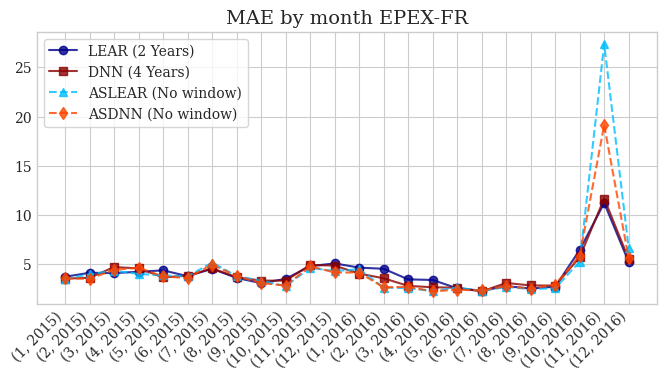

In [136]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'LEAR (2 Years)'), ('dnn', 'DNN (4 Years)'), ('lear_estandarizacion_movil', 'ASLEAR (No window)'), ('dnn_estandarizacion_movil', 'ASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month EPEX-FR")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [137]:
# fig.savefig("mae_by_month_fr.eps")

# DM test

In [138]:
resultados.columns = ['LEAR (2 Years)', 'LEAR (1 Year)', 'LEAR (6 Months)', 'DNN (3 Years)',
                      'ASLEAR (No window)', 'ASLEAR (2 Years)',
                      'ASLEAR (1 Year)',
                      'ASLEAR (6 Months)', 'ASDNN (No window)']

In [139]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_FR',
 'LEAR (2 Years)',
 'LEAR (1 Year)',
 'LEAR (6 Months)',
 'DNN (3 Years)',
 'ASLEAR (No window)',
 'ASLEAR (2 Years)',
 'ASLEAR (1 Year)',
 'ASLEAR (6 Months)',
 'ASDNN (No window)']

In [140]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

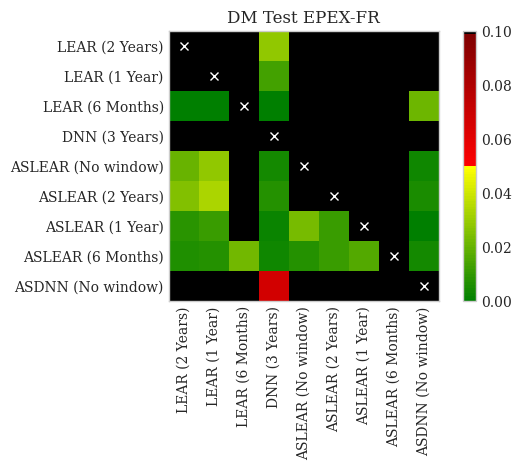

In [141]:
plot_multivariate_DM_test(real_price=df.md_FR, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test EPEX-FR')

# EPEX-FR No outliers

In [142]:
dict_modelos = {
    'lear_2_años': 'fr_epftoolbox_final_2_anos_ventana_no_outliers.csv',
    'lear_1_año': 'fr_epftoolbox_final_1_ano_ventana_no_outliers.csv',
    'lear_6_meses': 'fr_epftoolbox_final_6_meses_ventana_no_outliers.csv',
    'dnn': 'dnn_FR_final_no_outliers.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_FR_epftoolbox_final_sin_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_FR_epftoolbox_final_2_anos_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_FR_epftoolbox_final_1_ano_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_FR_epftoolbox_final_6_meses_ventana_no_outliers.csv',
    'dnn_estandarizacion_movil': 'dnn_FR_estandarizacion_movil_final_no_outliers.csv'
}

In [143]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2015, 1, 1), dt.datetime(2016, 12, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [144]:
df_md_FR = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\FR.csv")

In [145]:
df['md_FR'] = df_md_FR[pd.to_datetime(df_md_FR.Date) >= dt.datetime(2015, 1, 1)][' Prices'].to_numpy()

In [146]:
for k, v in dict_modelos.items():
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

In [147]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [148]:
df

,fecha_completa,fecha,hora,md_FR,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2015-01-01 00:00:00,2015-01-01,0,53.48,41.57,40.92,43.59,45.82,44.43,43.03,44.02,44.96,47.32
1,2015-01-01 01:00:00,2015-01-01,1,51.93,37.58,36.14,39.20,42.31,41.72,39.92,41.79,40.83,44.64
2,2015-01-01 02:00:00,2015-01-01,2,48.76,34.42,32.89,34.90,37.67,38.03,39.07,41.23,43.94,40.35
3,2015-01-01 03:00:00,2015-01-01,3,42.27,30.07,27.92,30.47,31.98,33.43,35.18,36.41,35.69,34.85
4,2015-01-01 04:00:00,2015-01-01,4,38.41,29.34,27.50,28.58,28.58,31.52,31.85,35.74,36.05,30.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2016-12-31 19:00:00,2016-12-31,19,69.72,74.47,71.31,72.08,78.11,72.18,71.48,72.83,72.40,72.24
17540,2016-12-31 20:00:00,2016-12-31,20,57.10,68.80,65.21,67.79,69.14,69.73,68.66,69.87,70.36,66.85
17541,2016-12-31 21:00:00,2016-12-31,21,54.49,59.89,56.91,58.30,61.72,65.33,64.42,65.75,63.31,63.17
17542,2016-12-31 22:00:00,2016-12-31,22,54.95,58.56,57.81,59.51,63.77,65.75,64.45,65.63,64.83,62.79


In [149]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_FR, df[modelo])
    maes.append(mae)

In [150]:
resultados.loc['MAE', :] = maes

In [151]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_FR, df[modelo])
    rmses.append(rmse)

In [152]:
resultados.loc['RMSE', :] = rmses

In [153]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_FR, df[modelo])
    smapes.append(smape)

In [154]:
resultados.loc['sMAPE', :] = smapes

In [155]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_FR']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [156]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2015-01-01,53.48,51.93,48.76,42.27,38.41,35.72,32.66,32.83,30.06,29.24,...,33.29,32.47,34.73,40.95,51.25,52.55,49.55,46.31,48.75,47.59
2015-01-02,38.80,36.73,33.52,27.50,22.84,26.10,27.17,33.33,42.06,46.13,...,41.00,39.78,39.73,50.24,54.10,53.13,48.81,42.99,48.76,48.45
2015-01-03,46.97,43.27,41.76,37.54,32.99,31.24,36.71,39.47,44.51,44.45,...,39.60,35.48,33.85,45.96,49.82,47.62,43.79,42.44,42.03,40.91
2015-01-04,36.26,32.28,27.63,23.94,15.69,18.14,20.03,19.23,27.31,34.54,...,32.68,25.25,30.43,43.04,54.35,51.57,49.99,41.18,44.79,42.96
2015-01-05,36.56,34.94,32.19,23.53,22.92,34.26,44.28,50.38,53.79,52.03,...,42.00,43.10,46.70,56.78,58.84,53.60,46.90,44.58,48.70,46.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,49.97,46.74,44.82,43.42,42.01,45.76,52.87,59.98,67.90,69.14,...,51.27,51.82,54.65,69.99,72.89,72.15,58.60,51.48,51.27,51.48
2016-12-28,48.31,45.76,43.03,40.46,39.34,40.83,44.80,51.00,53.00,56.90,...,50.77,51.60,55.20,63.28,63.70,59.82,62.36,50.00,49.02,47.73
2016-12-29,42.40,39.30,36.83,34.11,34.99,37.64,47.30,51.27,57.42,58.03,...,49.60,51.63,54.43,63.95,67.17,66.40,59.41,51.72,56.44,55.20


In [157]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [158]:
resultados.loc['rMAE', :] = rmaes

In [159]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,4.38,4.4,4.72,4.36,4.04,4.01,4.07,4.25,4.09
RMSE,12.24,12.19,12.59,12.44,11.82,11.83,11.9,12.04,11.92
sMAPE,0.13,0.13,0.14,0.12,0.12,0.11,0.12,0.12,0.12
rMAE,0.73,0.74,0.79,0.73,0.68,0.67,0.68,0.71,0.68


## MAE by month

In [160]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [161]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_FR, df_month[modelo]))

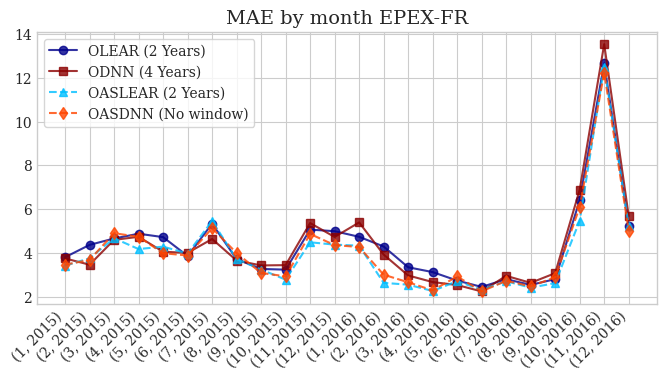

In [162]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'OLEAR (2 Years)'), ('dnn', 'ODNN (4 Years)'), ('lear_estandarizacion_movil_2_años', 'OASLEAR (2 Years)'), ('dnn_estandarizacion_movil', 'OASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month EPEX-FR")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [163]:
# fig.savefig("mae_by_month_fr_no_outliers.eps")

# DM test

In [164]:
resultados.columns = ['OLEAR (2 Years)', 'OLEAR (1 Year)', 'OLEAR (6 Months)', 'ODNN (3 Years)',
                      'OASLEAR (No window)', 'OASLEAR (2 Years)',
                      'OASLEAR (1 Year)',
                      'OASLEAR (6 Months)', 'OASDNN (No window)']

In [165]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_FR',
 'OLEAR (2 Years)',
 'OLEAR (1 Year)',
 'OLEAR (6 Months)',
 'ODNN (3 Years)',
 'OASLEAR (No window)',
 'OASLEAR (2 Years)',
 'OASLEAR (1 Year)',
 'OASLEAR (6 Months)',
 'OASDNN (No window)']

In [166]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

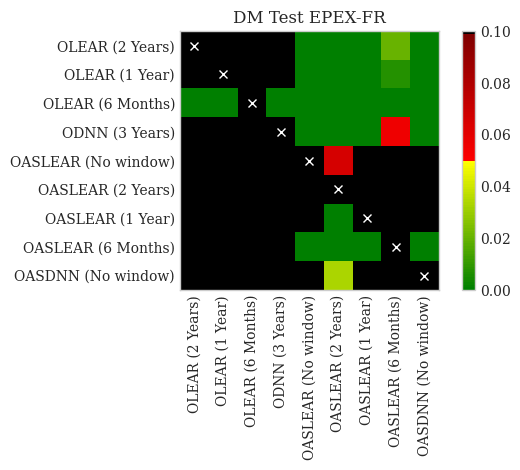

In [167]:
plot_multivariate_DM_test(real_price=df.md_FR, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test EPEX-FR')

# EPEX-BE

In [168]:
dict_modelos = {
    'lear_2_años': 'be_epftoolbox_final_2_anos_ventana.csv',
    'lear_1_año': 'be_epftoolbox_final_1_ano_ventana.csv',
    'lear_6_meses': 'be_epftoolbox_final_6_meses_ventana.csv',
    'dnn': 'dnn_be_final.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_be_epftoolbox_final_sin_ventana.csv',#'estandarizacion_movil_lear_be_epftoolbox_final_sin_ventana.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_be_epftoolbox_final_2_anos_ventana.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_be_epftoolbox_final_1_ano_ventana.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_be_epftoolbox_final_6_meses_ventana.csv',
    'dnn_estandarizacion_movil': 'dnn_be_estandarizacion_movil_final.csv'
}

In [169]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2015, 1, 1), dt.datetime(2016, 12, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [170]:
df_md_BE = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\BE.csv")

In [171]:
df['md_BE'] = df_md_BE[pd.to_datetime(df_md_BE.Date) >= dt.datetime(2015, 1, 1)][' Prices'].to_numpy()

In [172]:
df

,fecha_completa,fecha,hora,md_BE
0,2015-01-01 00:00:00,2015-01-01,0,53.48
1,2015-01-01 01:00:00,2015-01-01,1,51.93
2,2015-01-01 02:00:00,2015-01-01,2,48.76
3,2015-01-01 03:00:00,2015-01-01,3,42.27
4,2015-01-01 04:00:00,2015-01-01,4,38.41
...,...,...,...,...
17539,2016-12-31 19:00:00,2016-12-31,19,40.84
17540,2016-12-31 20:00:00,2016-12-31,20,40.10
17541,2016-12-31 21:00:00,2016-12-31,21,36.00
17542,2016-12-31 22:00:00,2016-12-31,22,35.00


In [173]:
for k, v in dict_modelos.items():
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

In [174]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [175]:
df

,fecha_completa,fecha,hora,md_BE,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
0,2015-01-01 00:00:00,2015-01-01,0,53.48,43.91,42.21,43.35,50.03,43.65,43.03,41.08,42.05,45.60
1,2015-01-01 01:00:00,2015-01-01,1,51.93,39.47,36.57,39.38,44.85,41.02,39.78,36.53,39.61,41.05
2,2015-01-01 02:00:00,2015-01-01,2,48.76,37.85,34.94,36.84,41.71,39.00,37.91,34.89,34.91,37.35
3,2015-01-01 03:00:00,2015-01-01,3,42.27,33.92,31.56,33.40,35.31,34.97,36.14,32.99,32.65,32.83
4,2015-01-01 04:00:00,2015-01-01,4,38.41,31.67,30.17,32.52,33.23,31.93,32.39,30.31,30.41,30.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2016-12-31 19:00:00,2016-12-31,19,40.84,62.22,59.43,63.33,60.44,61.67,65.91,68.37,75.84,59.22
17540,2016-12-31 20:00:00,2016-12-31,20,40.10,54.86,53.02,56.84,54.83,55.31,57.43,59.57,59.38,54.28
17541,2016-12-31 21:00:00,2016-12-31,21,36.00,47.32,45.30,49.35,49.41,50.21,51.23,53.56,53.18,50.38
17542,2016-12-31 22:00:00,2016-12-31,22,35.00,47.74,47.41,51.09,51.65,51.47,51.10,53.00,52.13,50.79


In [176]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_BE, df[modelo])
    maes.append(mae)

In [177]:
resultados.loc['MAE', :] = maes

In [178]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_BE, df[modelo])
    rmses.append(rmse)

In [179]:
resultados.loc['RMSE', :] = rmses

In [180]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_BE, df[modelo])
    smapes.append(smape)

In [181]:
resultados.loc['sMAPE', :] = smapes

In [182]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_BE']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [183]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2015-01-01,53.48,51.93,48.76,42.27,38.41,35.72,32.66,32.83,30.06,29.24,...,33.29,32.47,34.73,40.95,51.25,52.55,49.55,46.31,48.75,47.59
2015-01-02,38.80,36.73,33.52,27.50,22.84,26.10,27.17,33.33,42.06,46.13,...,41.00,39.78,39.73,50.24,54.10,53.13,48.81,42.99,48.76,48.45
2015-01-03,46.97,43.27,41.76,37.54,32.99,31.24,36.71,39.47,44.51,44.45,...,42.44,39.94,42.44,53.10,49.82,47.62,43.79,42.44,42.03,40.91
2015-01-04,36.26,32.28,27.63,27.03,27.04,27.19,27.13,27.06,27.63,34.54,...,37.00,36.87,40.00,53.10,54.35,51.57,49.99,41.18,44.79,42.96
2015-01-05,36.56,34.94,32.19,28.05,28.04,34.26,44.28,50.38,53.79,52.03,...,42.00,43.10,46.70,56.78,58.84,53.60,46.90,44.58,48.70,46.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,35.30,38.33,41.04,34.62,29.69,28.35,30.99,42.08,45.27,46.56,...,51.27,51.82,65.19,69.99,72.89,72.15,52.07,44.00,56.41,63.25
2016-12-28,37.12,36.03,34.15,36.03,33.95,34.82,43.70,51.00,53.00,57.34,...,50.77,51.60,55.20,63.29,63.70,59.82,61.20,50.00,43.18,43.77
2016-12-29,42.28,39.30,36.83,34.11,34.99,37.64,41.05,49.30,53.30,53.93,...,49.60,51.63,54.43,63.95,64.35,56.72,48.50,45.66,46.94,44.08


In [184]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [185]:
resultados.loc['rMAE', :] = rmaes

In [186]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,6.4,6.52,6.83,6.45,7.7,7.76,8.12,9.63,7.21
RMSE,16.47,16.07,16.18,16.84,19.19,20.28,22.38,42.19,18.08
sMAPE,0.15,0.16,0.16,0.15,0.17,0.17,0.18,0.19,0.16
rMAE,0.78,0.79,0.83,0.78,0.94,0.94,0.99,1.17,0.88


## MAE by month

In [187]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [188]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_BE, df_month[modelo]))

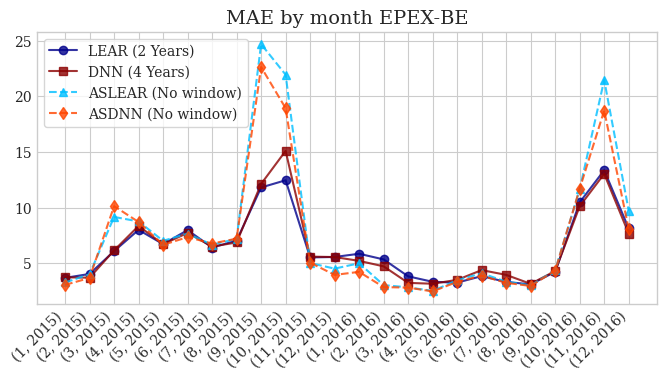

In [189]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'LEAR (2 Years)'), ('dnn', 'DNN (4 Years)'), ('lear_estandarizacion_movil', 'ASLEAR (No window)'), ('dnn_estandarizacion_movil', 'ASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month EPEX-BE")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [190]:
# fig.savefig("mae_by_month_be.eps")

# DM test

In [191]:
resultados.columns = ['LEAR (2 Years)', 'LEAR (1 Year)', 'LEAR (6 Months)', 'DNN (3 Years)',
                      'ASLEAR (No window)', 'ASLEAR (2 Years)',
                      'ASLEAR (1 Year)',
                      'ASLEAR (6 Months)', 'ASDNN (No window)']

In [192]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_BE',
 'LEAR (2 Years)',
 'LEAR (1 Year)',
 'LEAR (6 Months)',
 'DNN (3 Years)',
 'ASLEAR (No window)',
 'ASLEAR (2 Years)',
 'ASLEAR (1 Year)',
 'ASLEAR (6 Months)',
 'ASDNN (No window)']

In [193]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

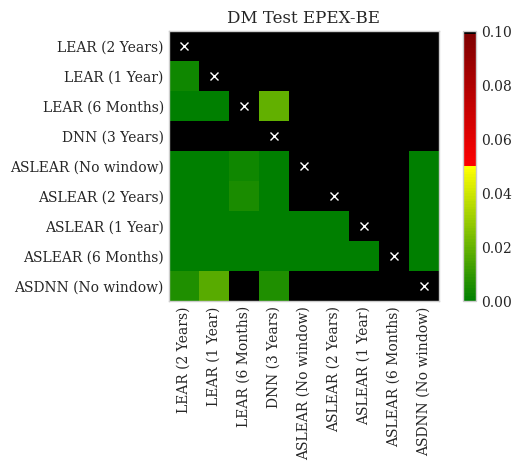

In [194]:
plot_multivariate_DM_test(real_price=df.md_BE, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test EPEX-BE')

# EPEX-BE No outliers

In [195]:
dict_modelos = {
    'lear_2_años': 'be_epftoolbox_final_2_anos_ventana_no_outliers.csv',
    'lear_1_año': 'be_epftoolbox_final_1_ano_ventana_no_outliers.csv',
    'lear_6_meses': 'be_epftoolbox_final_6_meses_ventana_no_outliers.csv',
    'dnn': 'dnn_BE_final_no_outliers.csv',
    'lear_estandarizacion_movil': 'estandarizacion_movil_lear_BE_epftoolbox_final_sin_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_2_años': 'estandarizacion_movil_lear_BE_epftoolbox_final_2_anos_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_1_año': 'estandarizacion_movil_lear_BE_epftoolbox_final_1_ano_ventana_no_outliers.csv',
    'lear_estandarizacion_movil_6_meses': 'estandarizacion_movil_lear_BE_epftoolbox_final_6_meses_ventana_no_outliers.csv',
    'dnn_estandarizacion_movil': 'dnn_BE_estandarizacion_movil_final_no_outliers.csv'
}

In [196]:
df = pd.DataFrame()
df['fecha_completa'] = pd.date_range(dt.datetime(2015, 1, 1), dt.datetime(2016, 12, 31, 23), freq='h')
df['fecha'] = df.fecha_completa.dt.strftime("%Y-%m-%d")
df['hora'] = df.fecha_completa.dt.hour

In [197]:
df_md_BE = pd.read_csv(r"C:\Users\csebastian\OneDrive - Universidad Politécnica de Madrid\AdaptStdEPF-main\AdaptStdEPF-main\Data\BE.csv")

In [198]:
df['md_BE'] = df_md_BE[pd.to_datetime(df_md_BE.Date) >= dt.datetime(2015, 1, 1)][' Prices'].to_numpy()

In [199]:
df

,fecha_completa,fecha,hora,md_BE
0,2015-01-01 00:00:00,2015-01-01,0,53.48
1,2015-01-01 01:00:00,2015-01-01,1,51.93
2,2015-01-01 02:00:00,2015-01-01,2,48.76
3,2015-01-01 03:00:00,2015-01-01,3,42.27
4,2015-01-01 04:00:00,2015-01-01,4,38.41
...,...,...,...,...
17539,2016-12-31 19:00:00,2016-12-31,19,40.84
17540,2016-12-31 20:00:00,2016-12-31,20,40.10
17541,2016-12-31 21:00:00,2016-12-31,21,36.00
17542,2016-12-31 22:00:00,2016-12-31,22,35.00


In [200]:
for k, v in dict_modelos.items():
    df[k] = pd.read_csv(v, index_col=0).to_numpy().reshape(-1,)

In [201]:
resultados = pd.DataFrame(columns = dict_modelos.keys())

In [202]:
maes = []
for modelo in resultados.columns:
    mae = MAE(df.md_BE, df[modelo])
    maes.append(mae)

In [203]:
resultados.loc['MAE', :] = maes

In [204]:
rmses = []
for modelo in resultados.columns:
    rmse = RMSE(df.md_BE, df[modelo])
    rmses.append(rmse)

In [205]:
resultados.loc['RMSE', :] = rmses

In [206]:
smapes = []
for modelo in resultados.columns:
    smape = sMAPE(df.md_BE, df[modelo])
    smapes.append(smape)

In [207]:
resultados.loc['sMAPE', :] = smapes

In [208]:
real_values = df.set_index(pd.DatetimeIndex(df.fecha_completa)).loc[:, ['md_BE']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=pd.DatetimeIndex(df.fecha_completa)[::24], columns=['h' + str(k) for k in range(24)])

In [209]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
fecha_completa,,,,,,,,,,,,,,,,,,,,,
2015-01-01,53.48,51.93,48.76,42.27,38.41,35.72,32.66,32.83,30.06,29.24,...,33.29,32.47,34.73,40.95,51.25,52.55,49.55,46.31,48.75,47.59
2015-01-02,38.80,36.73,33.52,27.50,22.84,26.10,27.17,33.33,42.06,46.13,...,41.00,39.78,39.73,50.24,54.10,53.13,48.81,42.99,48.76,48.45
2015-01-03,46.97,43.27,41.76,37.54,32.99,31.24,36.71,39.47,44.51,44.45,...,42.44,39.94,42.44,53.10,49.82,47.62,43.79,42.44,42.03,40.91
2015-01-04,36.26,32.28,27.63,27.03,27.04,27.19,27.13,27.06,27.63,34.54,...,37.00,36.87,40.00,53.10,54.35,51.57,49.99,41.18,44.79,42.96
2015-01-05,36.56,34.94,32.19,28.05,28.04,34.26,44.28,50.38,53.79,52.03,...,42.00,43.10,46.70,56.78,58.84,53.60,46.90,44.58,48.70,46.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,35.30,38.33,41.04,34.62,29.69,28.35,30.99,42.08,45.27,46.56,...,51.27,51.82,65.19,69.99,72.89,72.15,52.07,44.00,56.41,63.25
2016-12-28,37.12,36.03,34.15,36.03,33.95,34.82,43.70,51.00,53.00,57.34,...,50.77,51.60,55.20,63.29,63.70,59.82,61.20,50.00,43.18,43.77
2016-12-29,42.28,39.30,36.83,34.11,34.99,37.64,41.05,49.30,53.30,53.93,...,49.60,51.63,54.43,63.95,64.35,56.72,48.50,45.66,46.94,44.08


In [210]:
rmaes = []
for modelo, file in dict_modelos.items():
    rmae = rMAE(real_values, pd.read_csv(file, index_col=0))
    rmaes.append(rmae)

In [211]:
resultados.loc['rMAE', :] = rmaes

In [212]:
resultados

,lear_2_años,lear_1_año,lear_6_meses,dnn,lear_estandarizacion_movil,lear_estandarizacion_movil_2_años,lear_estandarizacion_movil_1_año,lear_estandarizacion_movil_6_meses,dnn_estandarizacion_movil
MAE,6.51,6.6,6.82,6.21,6.16,6.27,6.33,6.49,6.19
RMSE,17.1,16.95,17.13,16.78,16.53,16.63,16.61,16.79,16.68
sMAPE,0.15,0.16,0.16,0.14,0.14,0.15,0.15,0.15,0.14
rMAE,0.79,0.8,0.83,0.76,0.75,0.76,0.77,0.79,0.75


## MAE by month

In [213]:
df['mes'] = pd.to_datetime(df.fecha).dt.month
df['año'] = pd.to_datetime(df.fecha).dt.year

In [214]:
indices = []
dict_maes = {modelo: [] for modelo in resultados.columns}
for year in df.año.unique():
    df_year = df[df.año == year]
    for month in df_year.mes.unique():
        df_month = df_year[df_year.mes == month]
        indices.append(str((month, year)))
        for modelo in resultados.columns:
            dict_maes[modelo].append(MAE(df_month.md_BE, df_month[modelo]))

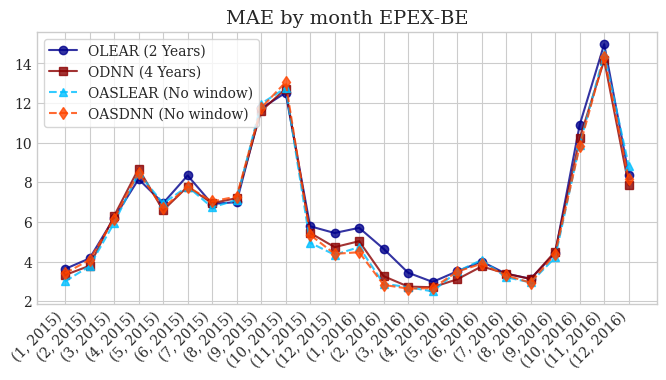

In [215]:
markers = ['o', 's', '^', 'd']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, (modelo, label) in enumerate([('lear_2_años', 'OLEAR (2 Years)'), ('dnn', 'ODNN (4 Years)'), ('lear_estandarizacion_movil', 'OASLEAR (No window)'), ('dnn_estandarizacion_movil', 'OASDNN (No window)')]):
    ax.plot(indices, dict_maes[modelo], linestyles[i], label=label, alpha = 0.8, marker=markers[i], color=colors[i])
ax.legend(prop={'size':10})
ax.legend(frameon=True)
ax.title.set_text("MAE by month EPEX-BE")
ax.title.set_size(14)
fig.autofmt_xdate(rotation=45)

In [216]:
# fig.savefig("mae_by_month_BE_final.eps")

# DM test

In [217]:
resultados.columns = ['OLEAR (2 Years)', 'OLEAR (1 Year)', 'OLEAR (6 Months)', 'ODNN (3 Years)',
                      'OASLEAR (No window)', 'OASLEAR (2 Years)',
                      'OASLEAR (1 Year)',
                      'OASLEAR (6 Months)', 'OASDNN (No window)']

In [218]:
list(df.columns[:4]) + list(resultados.columns)

['fecha_completa',
 'fecha',
 'hora',
 'md_BE',
 'OLEAR (2 Years)',
 'OLEAR (1 Year)',
 'OLEAR (6 Months)',
 'ODNN (3 Years)',
 'OASLEAR (No window)',
 'OASLEAR (2 Years)',
 'OASLEAR (1 Year)',
 'OASLEAR (6 Months)',
 'OASDNN (No window)']

In [219]:
df.columns = list(df.columns[:4]) + list(resultados.columns) + ['mes', 'año']

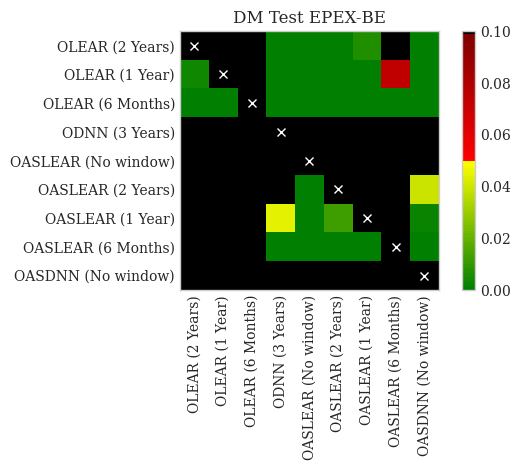

In [220]:
plot_multivariate_DM_test(real_price=df.md_BE, forecasts=df[resultados.columns], savefig=False, path="", title='DM Test EPEX-BE')